In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_csv('Data1.csv')

X = data[['X1', 'X2', 'X3']]
y = data['Y']

poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

coefficients = model.coef_
intercept = model.intercept_

print("Coefficients: ", coefficients)
print("Intercept (B0): ", intercept)


Coefficients:  [ 6.31439345e-16  5.09530887e-03 -3.86428782e-03  3.78135744e-03
 -6.82435912e-02  6.72894739e-02  7.11172071e-02 -2.46036860e-03
 -6.43238534e-02  2.82571685e-03]
Intercept (B0):  47.21918608944764


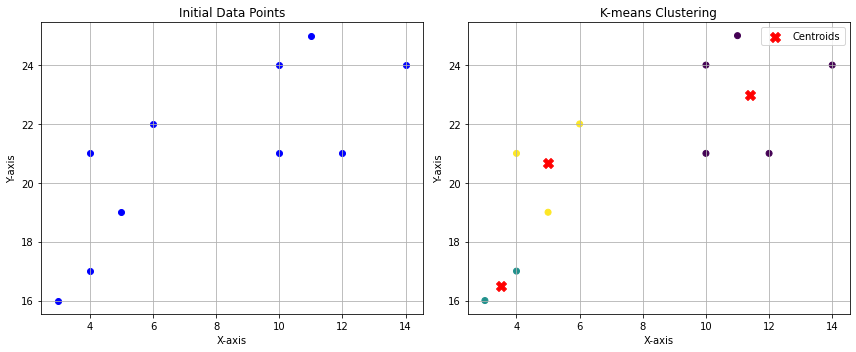

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

x = [4, 5, 10, 4, 3, 11, 14, 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = np.array(list(zip(x, y)))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', marker='o')
plt.title('Initial Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(data)

centers = kmeans.cluster_centers_
labels = kmeans.labels_

plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Sample dataset
data = {
    'Weather': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 
                'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 
                'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 
                    'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 
                    'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 
                 'Normal', 'High', 'Normal', 'Normal', 'Normal', 
                 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, 
              False, False, False, True, True, False, True],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 
             'Yes', 'No', 'Yes', 'Yes', 'Yes', 
             'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

label_encoders = {}
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

X = df.drop('Play', axis=1)
y = df['Play']

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)

tree_rules = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)

def entropy(target):
    value, counts = np.unique(target, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

def information_gain(data, feature, target):
    total_entropy = entropy(target)
    
    values, counts = np.unique(data[feature], return_counts=True)
    
    weighted_entropy = 0
    for value, count in zip(values, counts):
        subset = target[data[feature] == value]
        weighted_entropy += (count / sum(counts)) * entropy(subset)
    
    return total_entropy - weighted_entropy

info_gain_weather = information_gain(df, 'Weather', df['Play'])
info_gain_temperature = information_gain(df, 'Temperature', df['Play'])
info_gain_humidity = information_gain(df, 'Humidity', df['Play'])
info_gain_windy = information_gain(df, 'Windy', df['Play'])

print(f"\nInformation Gain for Weather: {info_gain_weather:.4f}")
print(f"Information Gain for Temperature: {info_gain_temperature:.4f}")
print(f"Information Gain for Humidity: {info_gain_humidity:.4f}")
print(f"Information Gain for Windy: {info_gain_windy:.4f}")


Decision Tree Rules:
 |--- Weather <= 0.50
|   |--- class: 1
|--- Weather >  0.50
|   |--- Humidity <= 0.50
|   |   |--- Weather <= 1.50
|   |   |   |--- Windy <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Windy >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Weather >  1.50
|   |   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Windy <= 0.50
|   |   |   |--- class: 1
|   |   |--- Windy >  0.50
|   |   |   |--- Temperature <= 1.00
|   |   |   |   |--- class: 0
|   |   |   |--- Temperature >  1.00
|   |   |   |   |--- class: 1


Information Gain for Weather: 0.2467
Information Gain for Temperature: 0.0292
Information Gain for Humidity: 0.1518
Information Gain for Windy: 0.0481


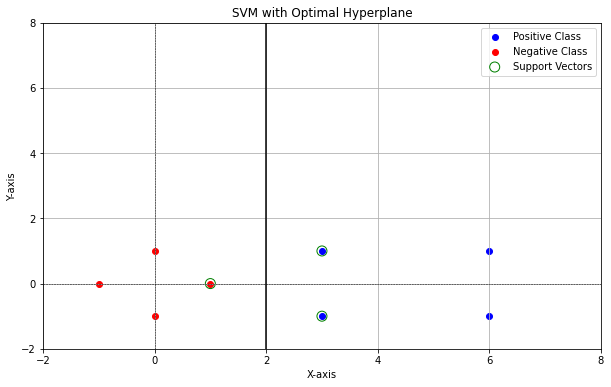

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

positive_class = np.array([[3, 1], [3, -1], [6, 1], [6, -1]])
negative_class = np.array([[1, 0], [0, 1], [0, -1], [-1, 0]])

X = np.vstack((positive_class, negative_class))
y = np.array([1] * len(positive_class) + [-1] * len(negative_class))

model = svm.SVC(kernel='linear', C=1.0)
model.fit(X, y)

w = model.coef_[0]
slope = -w[0] / w[1]
intercept = -model.intercept_[0] / w[1]

xx = np.linspace(-2, 8, 100)
yy = slope * xx + intercept

plt.figure(figsize=(10, 6))
plt.scatter(positive_class[:, 0], positive_class[:, 1], color='blue', label='Positive Class')
plt.scatter(negative_class[:, 0], negative_class[:, 1], color='red', label='Negative Class')

plt.plot(xx, yy, 'k-')
plt.xlim(-2, 8)
plt.ylim(-2, 8)

support_vectors = model.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='green', label='Support Vectors')

plt.title('SVM with Optimal Hyperplane')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()
